# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application


## Background 

In this project, I tried to make an analysis of USD/IDR price chart. Tha analysis can be used to get an insight about USD/IDr price action and the right times to buy or sell USD to IDR.

The site used is https://www.exchange-rates.org/history/IDR/USD/T and will get `Date` and `Rate`


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [17]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [18]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/ht'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [19]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. In this step we will find table part with `class : table-responsive` for unique id.

In [20]:
table = soup.find('div', attrs={'class':'table-responsive'}) 

# print(type(table))
print(table.prettify()[1:500])

div class="table-responsive">
 <table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
  <tbody>
   <tr>
    <td>
     7/7/2022
    </td>
    <td>
     Thursday
    </td>
    <td>
     <a href="/Rate/USD/IDR/7-7-2022">
      14,964.65000
     </a>
     IDR
    </td>
    <td class="text-narrow-screen-hidden">
     <a href="/Rate/USD/IDR/7-7-2022">
      USD IDR rate for 7/7/2022
     </a>
    </td>
   </tr>
   <tr>
    <td>
     7/6/2022
    </td>
    <td>


Finding row length is used for scrapping proces to iterate all of data in table. this step use `find_all()` from tag `tr` to get each value in table

In [21]:
row = table.find_all('tr')

row_length = len(row)
row_length

129

Here is the scrapping process.

In [22]:
temp = [] #initiating a tuple

for i in range(1, row_length+1):

    #get date 
    date = table.find_all('td')[4*i-4].text
    
    #get rate
    rate = table.find_all('td')[4*i-2].text
    
    temp.append((date,rate)) 

temp 

[('7/7/2022', '14,964.65000 IDR'),
 ('7/6/2022', '14,996.82520 IDR'),
 ('7/5/2022', '15,014.65000 IDR'),
 ('7/4/2022', '14,994.55000 IDR'),
 ('7/1/2022', '14,975.15000 IDR'),
 ('6/30/2022', '14,928.80000 IDR'),
 ('6/29/2022', '14,868.90000 IDR'),
 ('6/28/2022', '14,852.35000 IDR'),
 ('6/27/2022', '14,807.70000 IDR'),
 ('6/24/2022', '14,829.50000 IDR'),
 ('6/23/2022', '14,848.80000 IDR'),
 ('6/22/2022', '14,833.90000 IDR'),
 ('6/21/2022', '14,833.60000 IDR'),
 ('6/20/2022', '14,827.75000 IDR'),
 ('6/17/2022', '14,838.85000 IDR'),
 ('6/16/2022', '14,809.20000 IDR'),
 ('6/15/2022', '14,695.10000 IDR'),
 ('6/14/2022', '14,764.20000 IDR'),
 ('6/13/2022', '14,782.80000 IDR'),
 ('6/10/2022', '14,614.95000 IDR'),
 ('6/9/2022', '14,611.85000 IDR'),
 ('6/8/2022', '14,513.20000 IDR'),
 ('6/7/2022', '14,465.30000 IDR'),
 ('6/6/2022', '14,437.70000 IDR'),
 ('6/3/2022', '14,433.50000 IDR'),
 ('6/2/2022', '14,435.00000 IDR'),
 ('6/1/2022', '14,555.60000 IDR'),
 ('5/31/2022', '14,580.63428 IDR'),
 ('5

## Creating data frame & Data wrangling

Put the array into dataframe

In [23]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('date','rate'))
df.head()

,date,rate
0,7/7/2022,"14,964.65000 IDR"
1,7/6/2022,"14,996.82520 IDR"
2,7/5/2022,"15,014.65000 IDR"
3,7/4/2022,"14,994.55000 IDR"
4,7/1/2022,"14,975.15000 IDR"


Here we remove unwanted characters from the `rate` column

In [24]:
df['rate']=df['rate'].str.replace(' IDR', '')
df['rate']=df['rate'].str.replace(',', '')
df.head()

,date,rate
0,7/7/2022,14964.65000
1,7/6/2022,14996.82520
2,7/5/2022,15014.65000
3,7/4/2022,14994.55000
4,7/1/2022,14975.15000


Here we convert type of `date` column into right type `datetime64` and `rate` column into right type `float`

In [25]:
df['date'] = df['date'].astype('datetime64')
df['rate'] = df['rate'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    129 non-null    datetime64[ns]
 1   rate    129 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.1 KB


Data visualisation we can use line plot to show daily price movement of USD-IDR

<AxesSubplot:xlabel='date'>

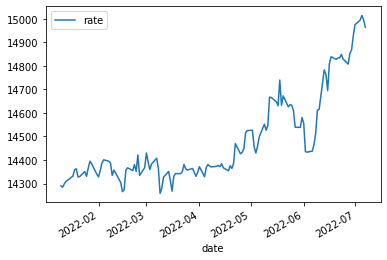

In [27]:
df = df.set_index('date')
df.plot()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:xlabel='date'>

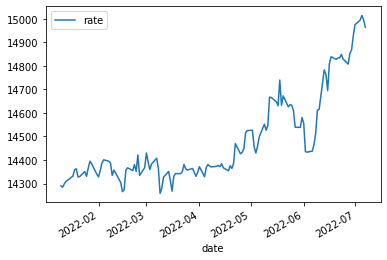

In [28]:
df.plot()

We can see that IDR exchange rate weakened against USD in 2022.

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.